In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter)
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib import gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

# Data loading

In [4]:
l = np.load('./results/2020_W/fw_ct_dataset.npz', allow_pickle=True)
data_indices = l['data_indices']
input_data = l['input_data']
output_label = l['output_label']
INPUT_MAXS = l['INPUT_MAXS']
INPUT_MINS = l['INPUT_MINS']
OUTPUT_MAX = l['OUTPUT_MAX']
OUTPUT_MIN = l['OUTPUT_MIN']

In [5]:
input_data = input_data.astype('float32')
output_label = output_label.astype('float32')

In [6]:
input_data = input_data.reshape(input_data.shape[0], -1)

In [7]:
print(input_data.shape)
print(output_label.shape)

(456, 1296)
(456, 1)


In [8]:
print(INPUT_MAXS)
print(INPUT_MINS)

[  42.31875   99.      1313.3       78.755     10.006      5.057
   36.58      55.877     19.731  ]
[11.5     4.4325 -0.5957 32.115   0.205   0.112  11.53    8.744  11.393 ]


In [9]:
print(OUTPUT_MAX)
print(OUTPUT_MIN)

2.5180414673761202
0.31621880464190666


In [10]:
# data_indices, input_data, output_label = shuffle(data_indices, input_data, output_label, random_state=3101)

In [11]:
N_TRAIN = int(input_data.shape[0]*.09)
N_DEV = int(input_data.shape[0]/3)
TRAIN_INDEX = [_ for _ in range(N_TRAIN)] + \
              [_ for _ in range(N_DEV, N_DEV+N_TRAIN)] + \
              [_ for _ in range(N_DEV*2, N_DEV*2+N_TRAIN)]
TEST_INDEX = [_ for _ in range(input_data.shape[0]) if _ not in TRAIN_INDEX]
train_input = input_data[TRAIN_INDEX, ...]
train_label = output_label[TRAIN_INDEX, ...]
train_indices = data_indices[TRAIN_INDEX]
test_input = input_data[TEST_INDEX, ...]
test_label = output_label[TEST_INDEX, ...]
test_indices = data_indices[TEST_INDEX]

In [12]:
train_indices, val_indices, train_input, val_input, train_label, val_label = train_test_split(train_indices, train_input, train_label, test_size=0.3, shuffle=True, random_state=3101)

In [13]:
print(f'number of data set: {input_data.shape[0]}')
print(f'number of training set: {train_input.shape[0]}')
print(f'number of validation set: {val_input.shape[0]}')
print(f'number of test set: {test_input.shape[0]}')

number of data set: 456
number of training set: 86
number of validation set: 37
number of test set: 333


# Model construction

In [14]:
reg = linear_model.LinearRegression()

In [15]:
model = reg.fit(train_input, train_label)

In [16]:
pred_output = model.predict(test_input)

In [17]:
pred_output = pred_output*(OUTPUT_MAX - OUTPUT_MIN) + OUTPUT_MIN
test_label = test_label*(OUTPUT_MAX - OUTPUT_MIN) + OUTPUT_MIN

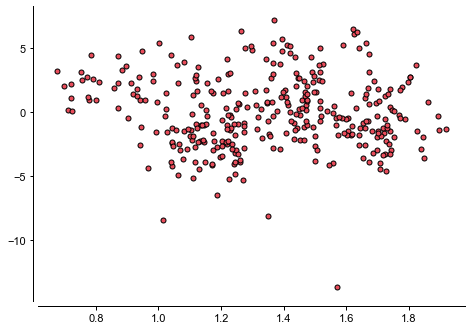

In [18]:
fig = plt.figure(figsize=((8.5/2.54*2), (6/2.54*2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(test_label, pred_output, 'o', ms=5, mec='k', c=cmap[0])


fig.tight_layout()

In [19]:
pred_df = pd.DataFrame(test_label, index=test_indices[:, 0], columns=['label'])
pred_df['pred'] = pred_output
pred_df.index = pd.DatetimeIndex(pred_df.index)

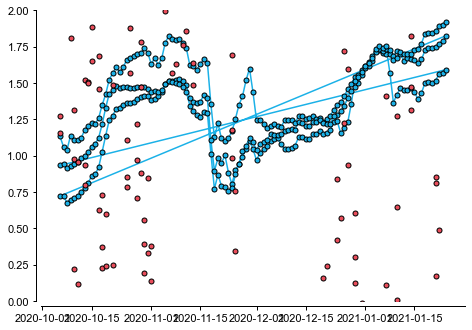

In [20]:
fig = plt.figure(figsize=((8.5/2.54*2), (6/2.54*2)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(pred_df.index, pred_df['label'], '-o', ms=5, mec='k', c=cmap[4])
ax0.plot(pred_df.index, pred_df['pred'], 'o', ms=5, mec='k', c=cmap[0])

ax0.set_ybound(0, 2)

fig.tight_layout()

In [21]:
pred_df.to_csv('./results/model_output/linreg_raw.csv')